In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance

In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mrwellsdavid/unsw-nb15")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/d/mrwellsdavid/unsw-nb15


In [10]:
training_data = pd.read_csv(f"{path}/UNSW_NB15_training-set.csv")
testing_data = pd.read_csv(f"{path}/UNSW_NB15_testing-set.csv")
training_data = training_data.drop_duplicates(subset="id")
testing_data = testing_data.drop_duplicates(subset="id")
combined_data = pd.concat([training_data, testing_data], ignore_index=True)
combined_data = combined_data.drop("id", axis=1)
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 257673 entries, 0 to 257672
Data columns (total 44 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   dur                257673 non-null  float64
 1   proto              257673 non-null  object 
 2   service            257673 non-null  object 
 3   state              257673 non-null  object 
 4   spkts              257673 non-null  int64  
 5   dpkts              257673 non-null  int64  
 6   sbytes             257673 non-null  int64  
 7   dbytes             257673 non-null  int64  
 8   rate               257673 non-null  float64
 9   sttl               257673 non-null  int64  
 10  dttl               257673 non-null  int64  
 11  sload              257673 non-null  float64
 12  dload              257673 non-null  float64
 13  sloss              257673 non-null  int64  
 14  dloss              257673 non-null  int64  
 15  sinpkt             257673 non-null  float64
 16  di

In [11]:
combined_data.head()

,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,...,1,2,0,0,0,1,2,0,Normal,0
1,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,...,1,2,0,0,0,1,2,0,Normal,0
2,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,...,1,3,0,0,0,1,3,0,Normal,0
3,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,...,1,3,0,0,0,2,3,0,Normal,0
4,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,...,1,3,0,0,0,2,3,0,Normal,0


In [12]:
combined_data.shape 

(257673, 44)

In [13]:
combined_data.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,257673.000000,257673.000000,257673.000000,2.576730e+05,2.576730e+05,2.576730e+05,257673.000000,257673.000000,2.576730e+05,2.576730e+05,...,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000,257673.000000
mean,1.246715,19.777144,18.514703,8.572952e+03,1.438729e+04,9.125391e+04,180.000931,84.754957,7.060869e+07,6.582143e+05,...,5.238271,4.032677,8.322964,0.012819,0.012850,0.132005,6.800045,9.121049,0.014274,0.639077
std,5.974305,135.947152,111.985965,1.737739e+05,1.461993e+05,1.603446e+05,102.488268,112.762131,1.857313e+08,2.412372e+06,...,8.160822,5.831515,11.120754,0.116091,0.116421,0.681854,8.396266,10.874752,0.118618,0.480269
min,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,3.078928e+01,62.000000,0.000000,1.231800e+04,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,2.000000,0.000000,0.000000
50%,0.004285,4.000000,2.000000,5.280000e+02,1.780000e+02,2.955665e+03,254.000000,29.000000,7.439423e+05,1.747441e+03,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,4.000000,0.000000,1.000000
75%,0.685777,12.000000,10.000000,1.362000e+03,1.064000e+03,1.250000e+05,254.000000,252.000000,8.000000e+07,2.210538e+04,...,4.000000,3.000000,8.000000,0.000000,0.000000,0.000000,8.000000,11.000000,0.000000,1.000000
max,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,254.000000,5.988000e+09,2.242273e+07,...,59.000000,46.000000,65.000000,4.000000,4.000000,30.000000,60.000000,62.000000,1.000000,1.000000


In [14]:
combined_data.isnull().sum()

dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat           0
label      

In [15]:
combined_data.count()

dur                  257673
proto                257673
service              257673
state                257673
spkts                257673
dpkts                257673
sbytes               257673
dbytes               257673
rate                 257673
sttl                 257673
dttl                 257673
sload                257673
dload                257673
sloss                257673
dloss                257673
sinpkt               257673
dinpkt               257673
sjit                 257673
djit                 257673
swin                 257673
stcpb                257673
dtcpb                257673
dwin                 257673
tcprtt               257673
synack               257673
ackdat               257673
smean                257673
dmean                257673
trans_depth          257673
response_body_len    257673
ct_srv_src           257673
ct_state_ttl         257673
ct_dst_ltm           257673
ct_src_dport_ltm     257673
ct_dst_sport_ltm     257673
ct_dst_src_ltm      

In [16]:
combined_data = combined_data.dropna()
combined_data.count()

dur                  257673
proto                257673
service              257673
state                257673
spkts                257673
dpkts                257673
sbytes               257673
dbytes               257673
rate                 257673
sttl                 257673
dttl                 257673
sload                257673
dload                257673
sloss                257673
dloss                257673
sinpkt               257673
dinpkt               257673
sjit                 257673
djit                 257673
swin                 257673
stcpb                257673
dtcpb                257673
dwin                 257673
tcprtt               257673
synack               257673
ackdat               257673
smean                257673
dmean                257673
trans_depth          257673
response_body_len    257673
ct_srv_src           257673
ct_state_ttl         257673
ct_dst_ltm           257673
ct_src_dport_ltm     257673
ct_dst_sport_ltm     257673
ct_dst_src_ltm      

In [17]:
# y_var = "label"

# x_vars = [col for col in combined_data.columns if col != y_var]  

In [18]:
combined_data.apply(lambda x: len(x.unique()))

dur                  109945
proto                   133
service                  13
state                    11
spkts                   646
dpkts                   627
sbytes                 9382
dbytes                 8653
rate                 115763
sttl                     13
dttl                      9
sload                121356
dload                116380
sloss                   490
dloss                   476
sinpkt               114318
dinpkt               110270
sjit                 117101
djit                 114861
swin                     22
stcpb                114473
dtcpb                114187
dwin                     19
tcprtt                63878
synack                57366
ackdat                53248
smean                  1377
dmean                  1362
trans_depth              14
response_body_len      2819
ct_srv_src               57
ct_state_ttl              7
ct_dst_ltm               52
ct_src_dport_ltm         52
ct_dst_sport_ltm         35
ct_dst_src_ltm      

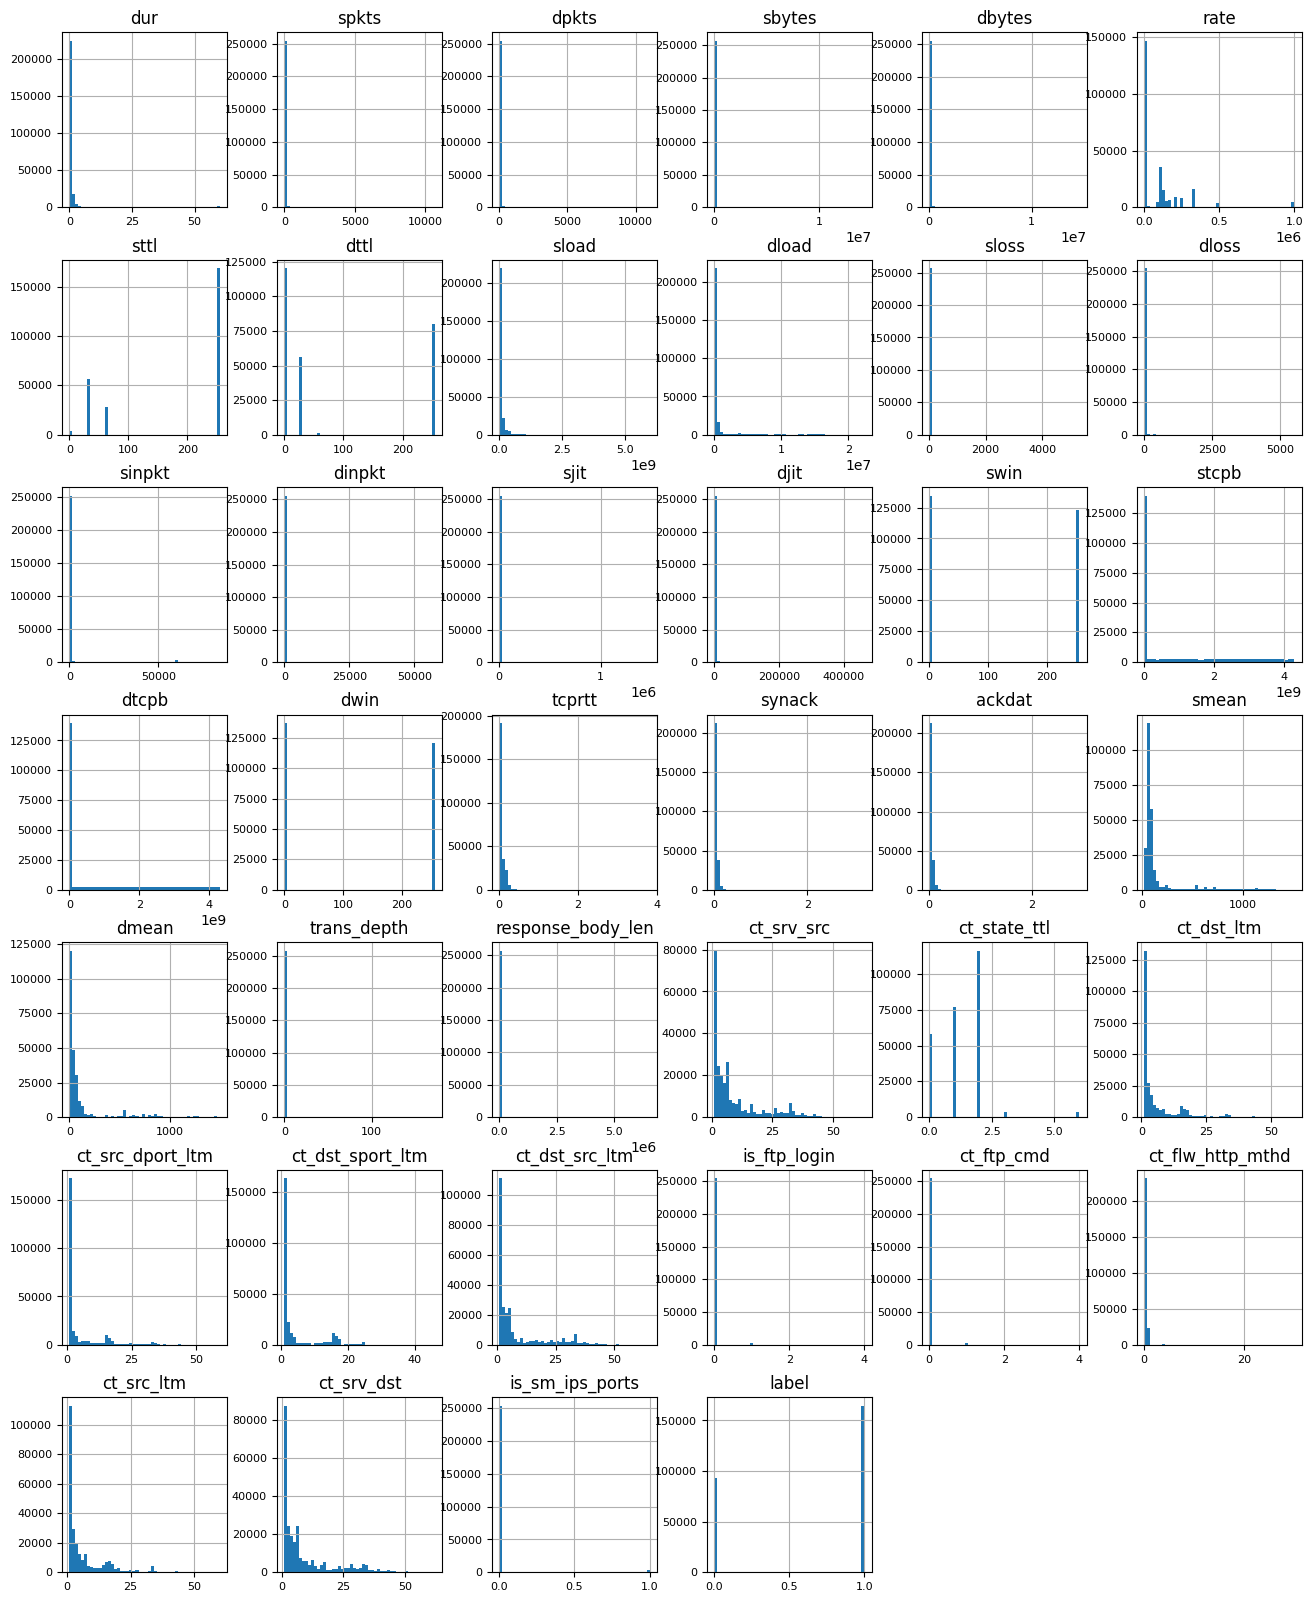

In [19]:
combined_data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

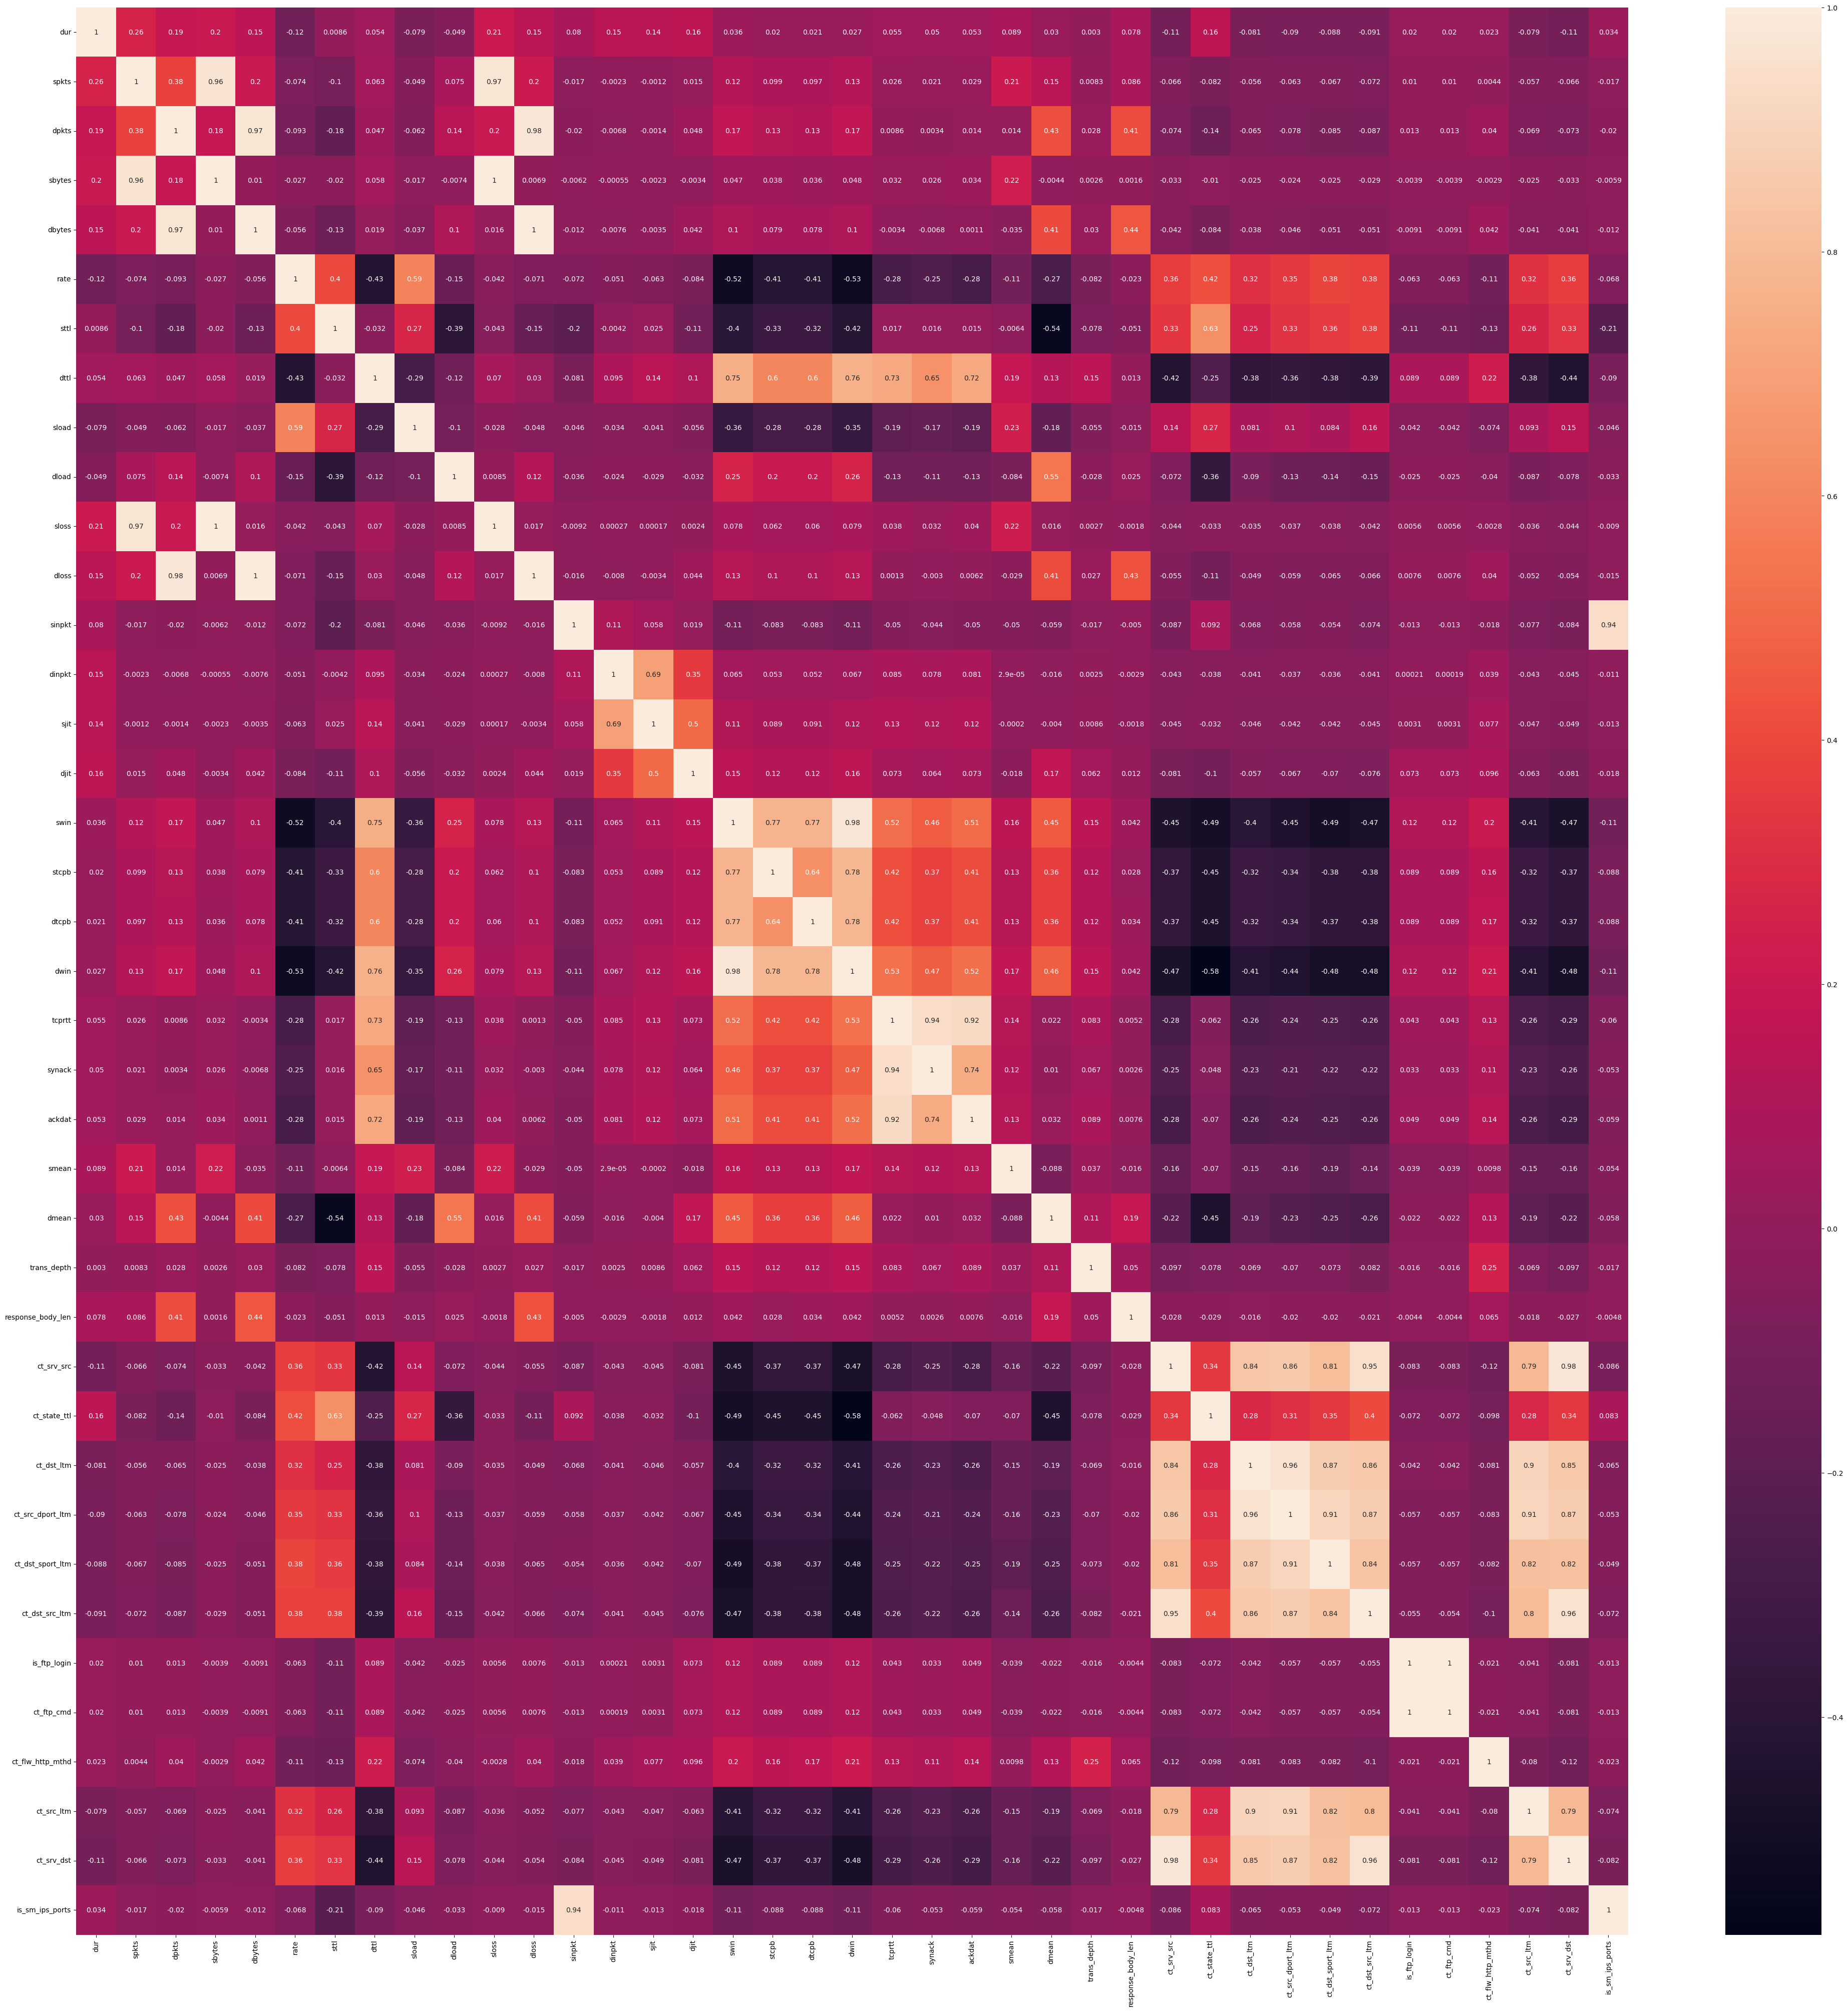

In [20]:
plt.figure(figsize=(50, 50))
sns.heatmap(combined_data.drop(columns=["label", "proto", "service", "state", "attack_cat"], axis=1).corr(), annot=True)
plt.show()

In [21]:
correlation_matrix = combined_data.drop(columns=["label", "proto", "service", "state", "attack_cat"], axis=1).corr()

high_corr = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > 0.6:
            colname = correlation_matrix.columns[i]
            high_corr.add(colname)

high_corr

{'ackdat',
 'ct_dst_ltm',
 'ct_dst_sport_ltm',
 'ct_dst_src_ltm',
 'ct_ftp_cmd',
 'ct_src_dport_ltm',
 'ct_src_ltm',
 'ct_srv_dst',
 'ct_state_ttl',
 'dbytes',
 'dloss',
 'dtcpb',
 'dwin',
 'is_sm_ips_ports',
 'sbytes',
 'sjit',
 'sloss',
 'stcpb',
 'swin',
 'synack',
 'tcprtt'}

In [22]:
combined_sample = combined_data.sample(25000)

# Split the target variables
# Exclude label column because it gives away the answer
combined_sample = combined_sample.drop(columns=["attack_cat"])
predictor = combined_sample.iloc[:, combined_sample.columns != "label"]
target = combined_sample.iloc[:, combined_sample.columns == "label"]
print(target.shape)
print(np.sum(target))

(25000, 1)
label    15991
dtype: int64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [23]:
categorical_columns = [col for col in predictor.columns.values if predictor[col].dtype == "object"]

df_categorical = predictor[categorical_columns]

df_numeric = predictor.drop(categorical_columns, axis=1)

In [24]:
dummy_code_cat_vars = pd.get_dummies(df_categorical, drop_first=True)

dummy_code_cat_vars.describe()

,proto_a/n,proto_aes-sp3-d,proto_any,proto_argus,proto_aris,proto_arp,proto_ax.25,proto_bbn-rcc,proto_bna,proto_br-sat-mon,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
count,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000,...,25000,25000,25000,25000,25000,25000,25000,25000,25000,25000
unique,2,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
top,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
freq,24993,24990,24971,24986,24991,24639,24992,24993,24988,24994,...,24998,24325,24991,24860,24994,23058,13454,13860,24638,24991


In [25]:
df_predictor = pd.concat([df_numeric, dummy_code_cat_vars], axis=1)
df_predictor

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
48970,0.000008,2,0,200,0,100000.002500,254,0,8.000000e+07,0.000000,...,False,False,False,False,False,False,False,True,False,False
218070,0.000005,2,0,200,0,200000.005100,254,0,1.600000e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
7385,0.000003,2,0,200,0,333333.321500,254,0,2.666667e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
93805,0.004710,4,4,568,320,1486.199573,31,29,7.235669e+05,407643.312500,...,False,False,False,False,False,True,False,False,False,False
216628,0.000002,2,0,114,0,500000.001300,254,0,2.280000e+08,0.000000,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89228,0.001002,2,2,146,178,2994.012136,31,29,5.828344e+05,710578.875000,...,False,False,False,False,False,True,False,False,False,False
227743,1.207417,8,8,364,586,12.423214,62,252,2.113603e+03,3398.991455,...,False,False,False,False,False,False,True,False,False,False
207739,0.000006,2,0,114,0,166666.660800,254,0,7.600000e+07,0.000000,...,False,False,False,False,False,False,False,True,False,False
182624,0.482751,10,6,1132,268,31.071918,254,252,1.688655e+04,3712.058594,...,False,False,False,False,False,False,True,False,False,False


In [4]:
df_predictor[['service_radius', 'state_CON']].astype(int)


NameError: name 'df_predictor' is not defined

In [26]:
df_predictor.shape

(25000, 186)

In [27]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(df_predictor, target, test_size=0.2, stratify=target)
print("x_train ", X_train.shape)
print("x_test ", X_test.shape)
print("y_train ", y_train.shape)
print("y_test ", y_test.shape)

x_train  (20000, 186)
x_test  (5000, 186)
y_train  (20000, 1)
y_test  (5000, 1)


In [28]:
scaler = StandardScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train))
X_test_scaled = pd.DataFrame(scaler.transform(X_test))
X_train_scaled.columns = X_train.columns.values
X_test_scaled.columns = X_test.columns.values
X_train_scaled.index = X_train.index.values
X_test_scaled.index = X_test.index.values
X_train = X_train_scaled
X_test = X_test_scaled
X_train.describe()

,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,...,service_radius,service_smtp,service_snmp,service_ssh,service_ssl,state_CON,state_FIN,state_INT,state_REQ,state_RST
count,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,...,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04,2.000000e+04
mean,1.065814e-18,1.776357e-17,-1.634248e-17,-3.552714e-18,5.684342e-18,8.810730e-17,6.501466e-17,-4.583001e-17,-2.344791e-17,-1.847411e-17,...,-1.421085e-18,-1.421085e-17,1.421085e-18,6.394885e-18,4.263256e-18,-4.405365e-17,-1.989520e-17,-4.316547e-17,-1.030287e-17,7.105427e-19
std,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,...,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00,1.000025e+00
min,-2.098689e-01,-1.742784e-01,-1.492851e-01,-5.457936e-02,-8.964225e-02,-5.676495e-01,-1.765658e+00,-7.649159e-01,-3.556685e-01,-2.679619e-01,...,-7.071245e-03,-1.632218e-01,-2.121798e-02,-7.299479e-02,-1.732311e-02,-2.900489e-01,-9.255622e-01,-8.980654e-01,-1.198044e-01,-1.871156e-02
25%,-2.098676e-01,-1.641647e-01,-1.492851e-01,-5.402152e-02,-8.964225e-02,-5.674602e-01,-1.159237e+00,-7.649159e-01,-3.556106e-01,-2.679619e-01,...,-7.071245e-03,-1.632218e-01,-2.121798e-02,-7.299479e-02,-1.732311e-02,-2.900489e-01,-9.255622e-01,-8.980654e-01,-1.198044e-01,-1.871156e-02
50%,-2.090580e-01,-1.439373e-01,-1.329934e-01,-5.057604e-02,-8.854713e-02,-5.495836e-01,7.187101e-01,-5.096248e-01,-3.524740e-01,-2.671681e-01,...,-7.071245e-03,-1.632218e-01,-2.121798e-02,-7.299479e-02,-1.732311e-02,-2.900489e-01,-9.255622e-01,-8.980654e-01,-1.198044e-01,-1.871156e-02
75%,-8.944296e-02,-6.302763e-02,-6.782630e-02,-4.393118e-02,-8.342530e-02,2.180233e-01,7.187101e-01,1.453475e+00,3.665875e-02,-2.594674e-01,...,-7.071245e-03,-1.632218e-01,-2.121798e-02,-7.299479e-02,-1.732311e-02,-2.900489e-01,1.080424e+00,1.113505e+00,-1.198044e-01,-1.871156e-02
max,1.000601e+01,6.836634e+01,8.924365e+01,7.523436e+01,9.007635e+01,5.717732e+00,7.284910e-01,1.453475e+00,2.645990e+01,7.809816e+00,...,1.414178e+02,6.126634e+00,4.712984e+01,1.369961e+01,5.772637e+01,3.447695e+00,1.080424e+00,1.113505e+00,8.346938e+00,5.344289e+01


In [29]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from time import time

print(f"Original number of features: {X_train.shape[1]}")

Original number of features: 186


In [30]:
start_time = time()

var_selector = VarianceThreshold(threshold=0.01)
X_train_var = pd.DataFrame(var_selector.fit_transform(X_train), index=X_train.index)
X_test_var = pd.DataFrame(var_selector.transform(X_test), index=X_test.index)

var_selected_features = X_train.columns[var_selector.get_support()].tolist()
X_train_var.columns = var_selected_features
X_test_var.columns = var_selected_features

print(f"Removed {X_train.shape[1] - len(var_selected_features)} low-variance features")
print(f"Execution time: {time() - start_time:.2f} seconds")


1. Variance Threshold
Features selected using variance threshold: 186
Removed 0 low-variance features
Execution time: 0.07 seconds


In [31]:
start_time = time()

correlation_matrix = X_train.corr().abs()

upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

correlated_features = [column for column in upper.columns if any(upper[column] > 0.8)]
print(f"Number of correlated features: {len(correlated_features)}")

X_train_corr = X_train.drop(columns=correlated_features)
X_test_corr = X_test.drop(columns=correlated_features)
corr_selected_features = X_train_corr.columns.tolist()

print(f"Features remaining after removing highly correlated features: {len(corr_selected_features)}")
print(f"Execution time: {time() - start_time:.2f} seconds")

# Plot correlation heatmap for remaining features (if not too many)
if len(corr_selected_features) <= 30:
    plt.figure(figsize=(12, 10))
    sns.heatmap(X_train_corr.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Correlation Matrix After Removing Highly Correlated Features")
    plt.tight_layout()
    plt.show()


2. Correlation-based Feature Selection
Number of correlated features: 21
Features remaining after removing highly correlated features: 165
Execution time: 1.95 seconds


/usr/local/lib/python3.10/dist-packages/pandas/core/computation/expressions.py:73: RuntimeWarning: invalid value encountered in greater
  return op(a, b)



3. Feature Importance using Random Forest
Top 30 features selected by Random Forest:
         Feature  Importance
6           sttl    0.077473
28  ct_state_ttl    0.059445
8          sload    0.050574
9          dload    0.049054
7           dttl    0.046096
3         sbytes    0.043474
23         smean    0.038385
4         dbytes    0.037745
5           rate    0.034260
20        tcprtt    0.033463
Execution time: 2.94 seconds


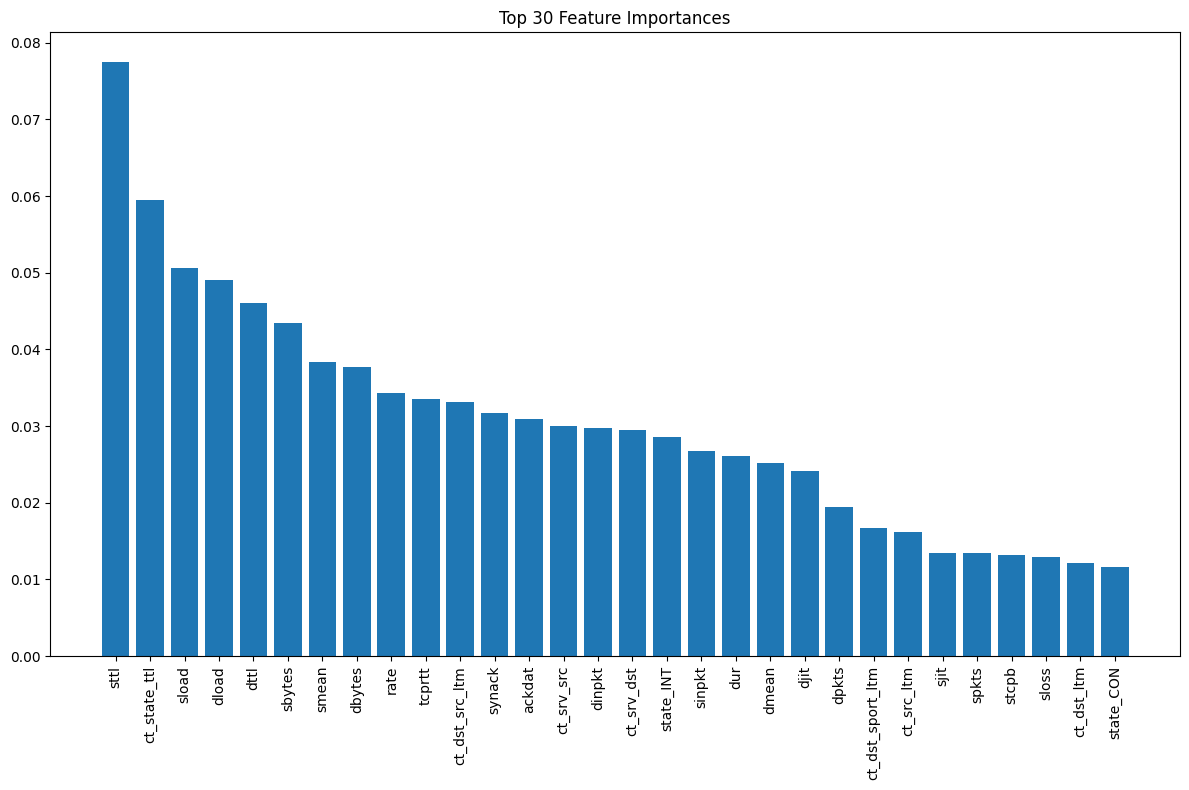

In [32]:
start_time = time()

rf = RandomForestClassifier(n_estimators=100, random_state=0)
rf.fit(X_train, y_train.values.ravel())  # Flatten y_train for sklearn compatibility

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]

feature_importance_df = pd.DataFrame({"Feature": X_train.columns, "Importance": importances}).sort_values(
    "Importance", ascending=False
)

k = 30 
top_k_features = feature_importance_df["Feature"][:k].values
X_train_rf = X_train[top_k_features]
X_test_rf = X_test[top_k_features]

print(f"Top {k} features selected by Random Forest:")
print(feature_importance_df.head(10))  # Display top 10 features
print(f"Execution time: {time() - start_time:.2f} seconds")

plt.figure(figsize=(12, 8))
plt.title(f"Top {k} Feature Importances")
plt.bar(range(k), importances[indices][:k], align="center")
plt.xticks(range(k), X_train.columns[indices][:k], rotation=90)
plt.tight_layout()
plt.show()

In [33]:
start_time = time()

selector_f = SelectKBest(f_classif, k=30)
X_train_kbest_f_np = selector_f.fit_transform(X_train, y_train.values.ravel())
X_test_kbest_f_np = selector_f.transform(X_test)

kbest_f_selected_features = X_train.columns[selector_f.get_support()].tolist()

X_train_kbest_f = pd.DataFrame(X_train_kbest_f_np, columns=kbest_f_selected_features, index=X_train.index)
X_test_kbest_f = pd.DataFrame(X_test_kbest_f_np, columns=kbest_f_selected_features, index=X_test.index)

print(f"Features selected using SelectKBest with F-test: {len(kbest_f_selected_features)}")
print(f"Selected features: {kbest_f_selected_features[:10]}...")  # Display first 10 features
print(f"Execution time: {time() - start_time:.2f} seconds")


4. SelectKBest with F-test (ANOVA)
Features selected using SelectKBest with F-test: 30
Selected features: ['dpkts', 'rate', 'sttl', 'sload', 'dload', 'sinpkt', 'swin', 'stcpb', 'dtcpb', 'dwin']...
Execution time: 0.08 seconds


In [34]:
start_time = time()

selector_mi = SelectKBest(mutual_info_classif, k=30)
X_train_kbest_mi_np = selector_mi.fit_transform(X_train, y_train.values.ravel())
X_test_kbest_mi_np = selector_mi.transform(X_test)

kbest_mi_selected_features = X_train.columns[selector_mi.get_support()].tolist()

X_train_kbest_mi = pd.DataFrame(X_train_kbest_mi_np, columns=kbest_mi_selected_features, index=X_train.index)
X_test_kbest_mi = pd.DataFrame(X_test_kbest_mi_np, columns=kbest_mi_selected_features, index=X_test.index)

print(f"Features selected using SelectKBest with Mutual Information: {len(kbest_mi_selected_features)}")
print(f"Selected features: {kbest_mi_selected_features[:10]}...")  # Display first 10 features
print(f"Execution time: {time() - start_time:.2f} seconds")


5. SelectKBest with Mutual Information
Features selected using SelectKBest with Mutual Information: 30
Selected features: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload']...
Execution time: 18.05 seconds


In [35]:
start_time = time()

estimator = RandomForestClassifier(n_estimators=100, random_state=0)
selector_rfe = RFE(estimator, n_features_to_select=30, step=0.1)
X_train_rfe_np = selector_rfe.fit_transform(X_train, y_train.values.ravel())
X_test_rfe_np = selector_rfe.transform(X_test)

rfe_selected_features = X_train.columns[selector_rfe.get_support()].tolist()

X_train_rfe = pd.DataFrame(X_train_rfe_np, columns=rfe_selected_features, index=X_train.index)
X_test_rfe = pd.DataFrame(X_test_rfe_np, columns=rfe_selected_features, index=X_test.index)

print(f"Features selected using RFE: {len(rfe_selected_features)}")
print(f"Selected features: {rfe_selected_features[:10]}...")  # Display first 10 features
print(f"Execution time: {time() - start_time:.2f} seconds")


6. Recursive Feature Elimination (RFE)
Features selected using RFE: 30
Selected features: ['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload']...
Execution time: 29.68 seconds



7. Feature Selection Methods Comparison
Features common between RF and F-test: 17
Features common between RF and MI: 28
Features common between RF and RFE: 28
Features common between F-test and MI: 16
Features common between F-test and RFE: 18
Features common between MI and RFE: 28

Features common across all methods: 15
Common features: ['ct_src_ltm', 'sinpkt', 'sload', 'dload', 'ct_dst_ltm', 'dpkts', 'ct_srv_src', 'rate', 'ct_srv_dst', 'sttl', 'ct_dst_src_ltm', 'ct_dst_sport_ltm', 'state_INT', 'dmean', 'ct_state_ttl']


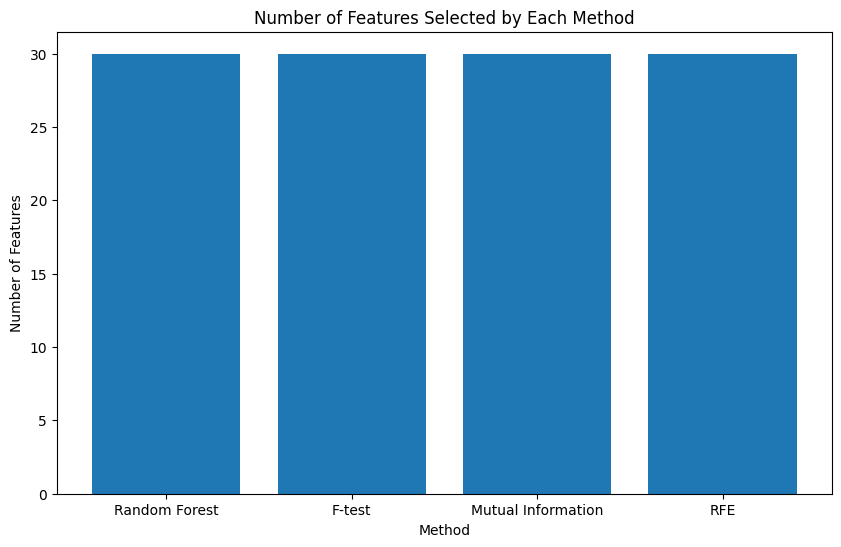

In [36]:
rf_set = set(top_k_features)
kbest_f_set = set(kbest_f_selected_features)
kbest_mi_set = set(kbest_mi_selected_features)
rfe_set = set(rfe_selected_features)

print(f"Features common between RF and F-test: {len(rf_set.intersection(kbest_f_set))}")
print(f"Features common between RF and MI: {len(rf_set.intersection(kbest_mi_set))}")
print(f"Features common between RF and RFE: {len(rf_set.intersection(rfe_set))}")
print(f"Features common between F-test and MI: {len(kbest_f_set.intersection(kbest_mi_set))}")
print(f"Features common between F-test and RFE: {len(kbest_f_set.intersection(rfe_set))}")
print(f"Features common between MI and RFE: {len(kbest_mi_set.intersection(rfe_set))}")

common_features = list(rf_set.intersection(kbest_f_set).intersection(kbest_mi_set).intersection(rfe_set))
print(f"\nFeatures common across all methods: {len(common_features)}")
print(f"Common features: {common_features}")

methods = ["Random Forest", "F-test", "Mutual Information", "RFE"]
feature_counts = [len(rf_set), len(kbest_f_set), len(kbest_mi_set), len(rfe_set)]

plt.figure(figsize=(10, 6))
plt.bar(methods, feature_counts)
plt.title("Number of Features Selected by Each Method")
plt.xlabel("Method")
plt.ylabel("Number of Features")
plt.show()

In [37]:
from sklearn.metrics import accuracy_score, roc_auc_score


def evaluate_feature_set(X_train_fs, X_test_fs, method_name):
    # Train a model
    model = RandomForestClassifier(n_estimators=100, random_state=0, class_weight="balanced")
    model.fit(X_train_fs, y_train.values.ravel())

    # Predict
    y_pred = model.predict(X_test_fs)
    y_prob = model.predict_proba(X_test_fs)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_prob)

    return {"method": method_name, "n_features": X_train_fs.shape[1], "accuracy": accuracy, "auc": auc}


results = []

results.append(evaluate_feature_set(X_train, X_test, "Original (All Features)"))

results.append(evaluate_feature_set(X_train_var, X_test_var, "Variance Threshold"))

results.append(evaluate_feature_set(X_train_corr, X_test_corr, "Correlation-based"))

results.append(evaluate_feature_set(X_train_rf, X_test_rf, "Random Forest"))

results.append(evaluate_feature_set(X_train_kbest_f, X_test_kbest_f, "F-test"))

results.append(evaluate_feature_set(X_train_kbest_mi, X_test_kbest_mi, "Mutual Information"))

results.append(evaluate_feature_set(X_train_rfe, X_test_rfe, "RFE"))

if len(common_features) > 0:
    X_train_common = X_train[common_features]
    X_test_common = X_test[common_features]
    results.append(evaluate_feature_set(X_train_common, X_test_common, "Common Features"))

results_df = pd.DataFrame(results)
results_df = results_df.sort_values("auc", ascending=False)
results_df


8. Model Evaluation with Different Feature Sets


,method,n_features,accuracy,auc
0,Original (All Features),186,0.9362,0.987357
1,Variance Threshold,186,0.9362,0.987357
5,Mutual Information,30,0.9360,0.987287
6,RFE,30,0.9360,0.987078
3,Random Forest,30,0.9358,0.986729
4,F-test,30,0.9338,0.985839
7,Common Features,15,0.9354,0.985007
2,Correlation-based,165,0.9230,0.984163


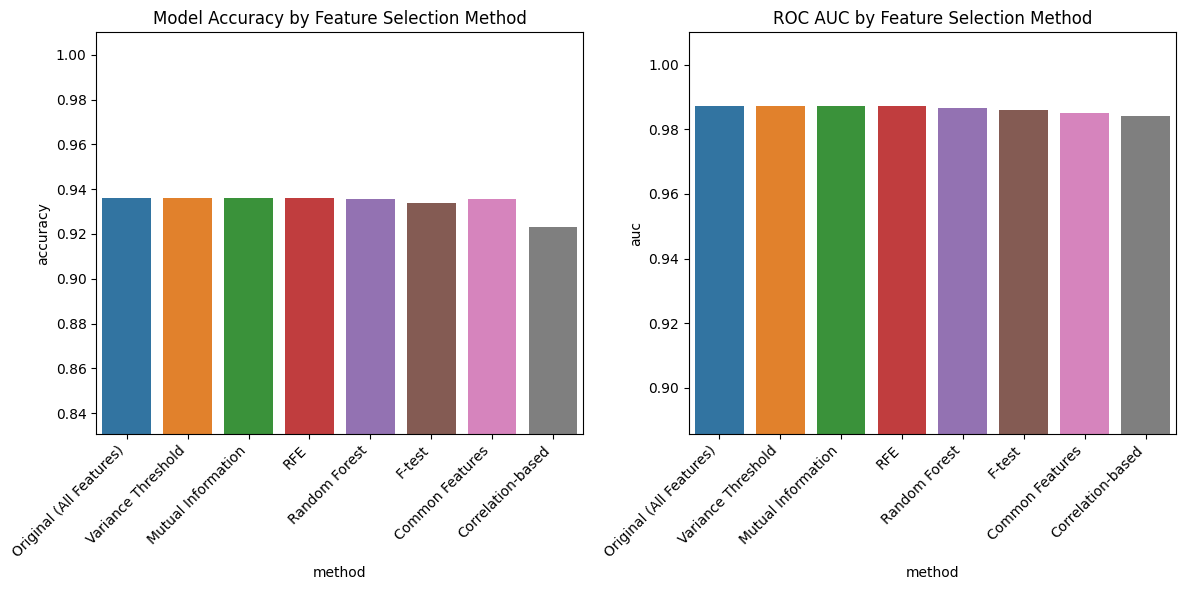

In [38]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x="method", y="accuracy", data=results_df)
plt.title("Model Accuracy by Feature Selection Method")
plt.xticks(rotation=45, ha="right")
plt.ylim(0.9 * results_df["accuracy"].min(), 1.01)

plt.subplot(1, 2, 2)
sns.barplot(x="method", y="auc", data=results_df)
plt.title("ROC AUC by Feature Selection Method")
plt.xticks(rotation=45, ha="right")
plt.ylim(0.9 * results_df["auc"].min(), 1.01)

plt.tight_layout()
plt.show()

In [39]:
best_method = results_df.iloc[0]["method"]
print(f"Best performing feature selection method: {best_method}")
print(f"Number of features: {results_df.iloc[0]['n_features']}")
print(f"Accuracy: {results_df.iloc[0]['accuracy']:.4f}")
print(f"AUC: {results_df.iloc[0]['auc']:.4f}")

if best_method == "Original (All Features)":
    print("\nUsing all original features for model training.")
    selected_features = X_train.columns.tolist()
elif best_method == "Variance Threshold":
    print("\nUpdating X_train and X_test with Variance Threshold selected features.")
    X_train = X_train_var
    X_test = X_test_var
    selected_features = var_selected_features
elif best_method == "Correlation-based":
    print("\nUpdating X_train and X_test with Correlation-based selected features.")
    X_train = X_train_corr
    X_test = X_test_corr
    selected_features = corr_selected_features
elif best_method == "Random Forest":
    print("\nUpdating X_train and X_test with Random Forest selected features.")
    X_train = X_train_rf
    X_test = X_test_rf
    selected_features = top_k_features.tolist()
elif best_method == "F-test":
    print("\nUpdating X_train and X_test with F-test selected features.")
    X_train = X_train_kbest_f
    X_test = X_test_kbest_f
    selected_features = kbest_f_selected_features
elif best_method == "Mutual Information":
    print("\nUpdating X_train and X_test with Mutual Information selected features.")
    X_train = X_train_kbest_mi
    X_test = X_test_kbest_mi
    selected_features = kbest_mi_selected_features
elif best_method == "RFE":
    print("\nUpdating X_train and X_test with RFE selected features.")
    X_train = X_train_rfe
    X_test = X_test_rfe
    selected_features = rfe_selected_features
elif best_method == "Common Features":
    print("\nUpdating X_train and X_test with Common Features across all methods.")
    X_train = X_train_common
    X_test = X_test_common
    selected_features = common_features

print(f"\nFinal training data shape: {X_train.shape}")
print(f"Final testing data shape: {X_test.shape}")

print(f"\nTop 10 selected features:\n{selected_features[:10]}")

Best performing feature selection method: Original (All Features)
Number of features: 186
Accuracy: 0.9362
AUC: 0.9874

Using all original features for model training.

Final training data shape: (20000, 186)
Final testing data shape: (5000, 186)

Top 10 selected features (if available):
['dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload']


In [40]:
classifiers = dict(
    LogisticRegression=LogisticRegression(class_weight="balanced"),
    SVC=SVC(probability=True, class_weight="balanced"),
    RandomForestClassifier=RandomForestClassifier(class_weight="balanced"),
    DummyClassifier=DummyClassifier(strategy="uniform"),
    GradientBoostingClassifier=GradientBoostingClassifier(),
    AdaBoostClassifier=AdaBoostClassifier(),
    GaussianNB=GaussianNB(),
    KNeighborsClassifier=KNeighborsClassifier(),
    DecisionTreeClassifier=DecisionTreeClassifier(),
    ExtraTreesClassifier=ExtraTreesClassifier(class_weight="balanced"),
)
classifiers.items()

dict_items([('LogisticRegression', LogisticRegression(class_weight='balanced')), ('SVC', SVC(class_weight='balanced', probability=True)), ('RandomForestClassifier', RandomForestClassifier(class_weight='balanced')), ('DummyClassifier', DummyClassifier(strategy='uniform')), ('GradientBoostingClassifier', GradientBoostingClassifier()), ('AdaBoostClassifier', AdaBoostClassifier()), ('GaussianNB', GaussianNB()), ('KNeighborsClassifier', KNeighborsClassifier()), ('DecisionTreeClassifier', DecisionTreeClassifier()), ('ExtraTreesClassifier', ExtraTreesClassifier(class_weight='balanced'))])

In [41]:
def plot_confusion_matrix(y_test, y_pred):
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        pd.DataFrame(metrics.confusion_matrix(y_test, y_pred)), annot=True, fmt="d", cmap="YlGnBu", alpha=0.8, vmin=0
    )
    plt.title("Confusion matrix of the classifier")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()


def roc_auc(y_test, y_pred_proba):
    fpr, tpr, t = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.auc(fpr, tpr)
    plt.plot(fpr, tpr, label="ROC AUC " + str(round(auc, 2)))
    plt.legend()
    plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression


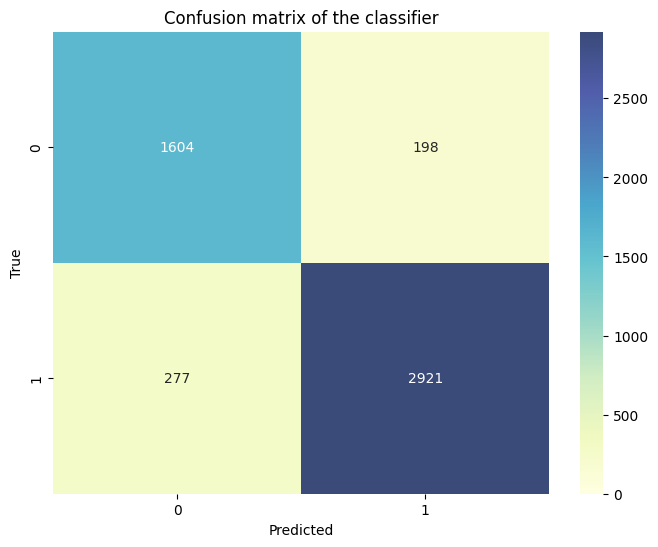

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1802
           1       0.94      0.91      0.92      3198

    accuracy                           0.91      5000
   macro avg       0.89      0.90      0.90      5000
weighted avg       0.91      0.91      0.91      5000



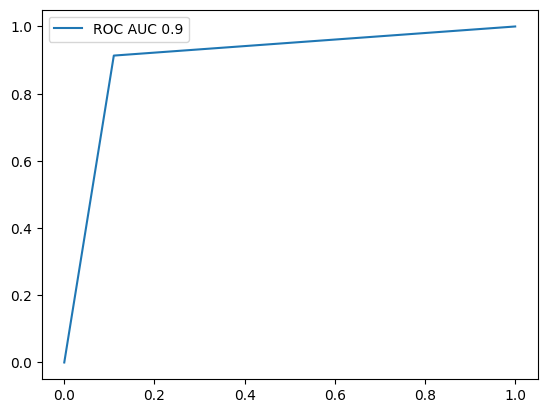

<ipython-input-42-ecc17f527c4d>:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_table = pd.concat(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC


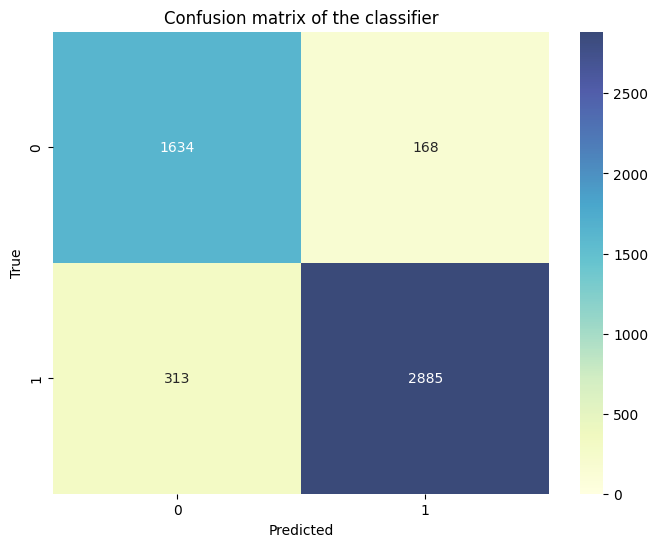

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1802
           1       0.94      0.90      0.92      3198

    accuracy                           0.90      5000
   macro avg       0.89      0.90      0.90      5000
weighted avg       0.91      0.90      0.90      5000



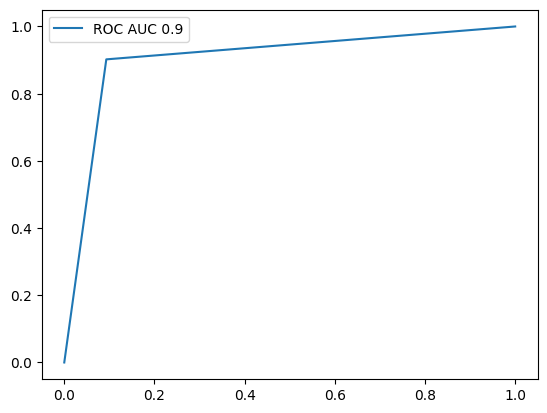

<ipython-input-42-ecc17f527c4d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


RandomForestClassifier


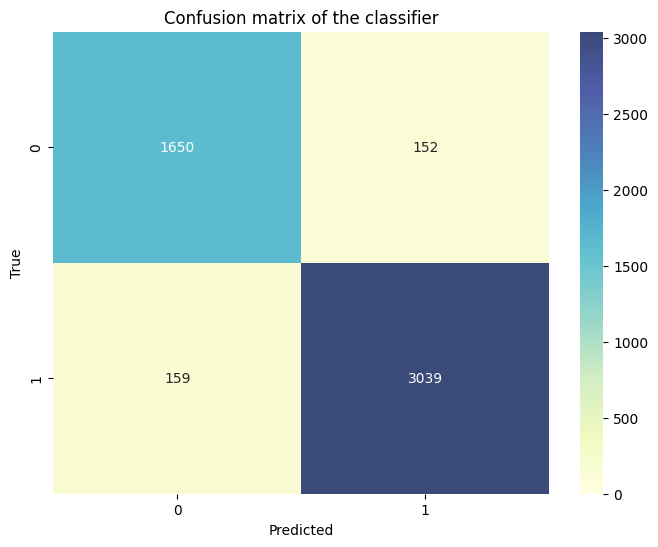

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1802
           1       0.95      0.95      0.95      3198

    accuracy                           0.94      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.94      0.94      0.94      5000



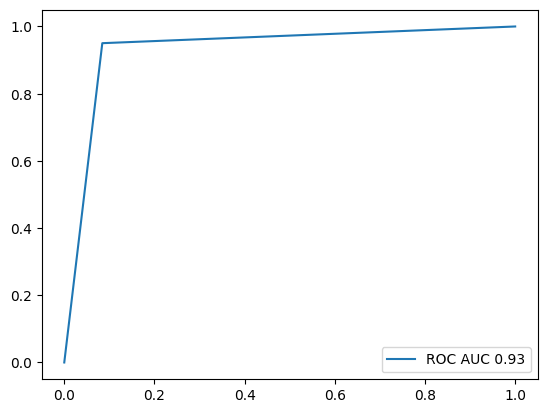

DummyClassifier


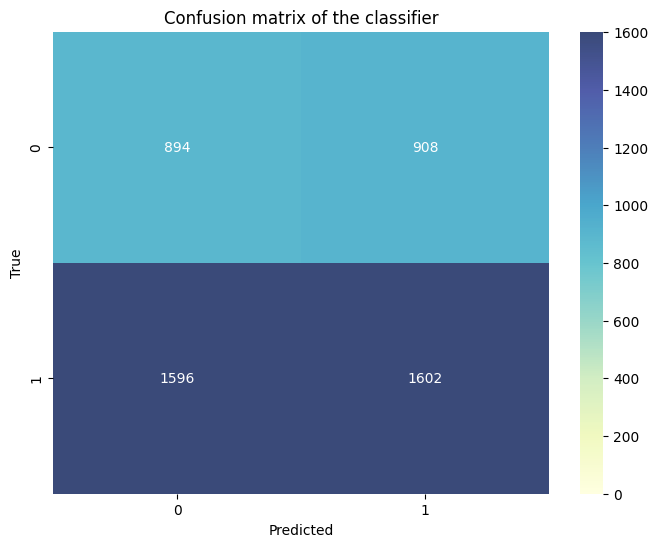

Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.50      0.42      1802
           1       0.64      0.50      0.56      3198

    accuracy                           0.50      5000
   macro avg       0.50      0.50      0.49      5000
weighted avg       0.54      0.50      0.51      5000



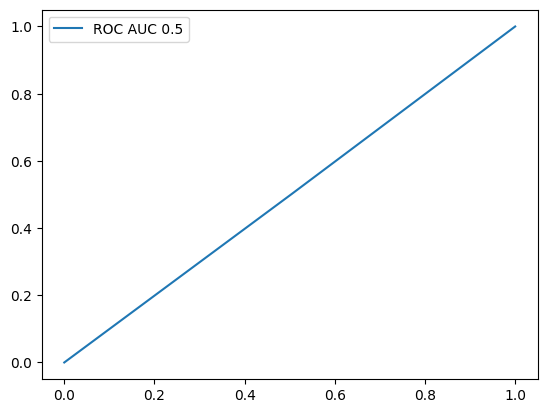

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier


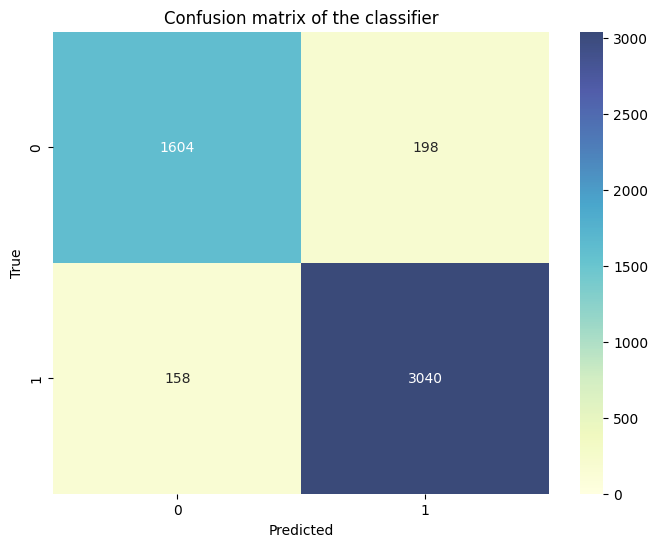

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      1802
           1       0.94      0.95      0.94      3198

    accuracy                           0.93      5000
   macro avg       0.92      0.92      0.92      5000
weighted avg       0.93      0.93      0.93      5000



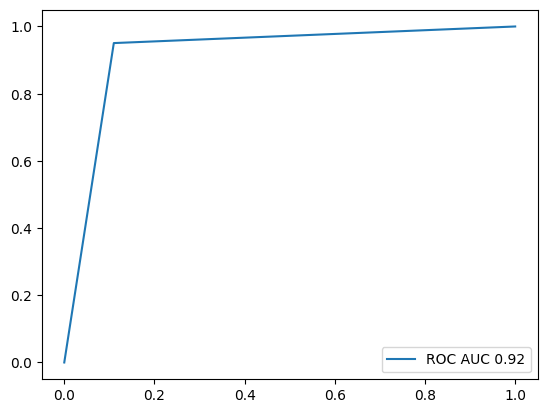

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostClassifier


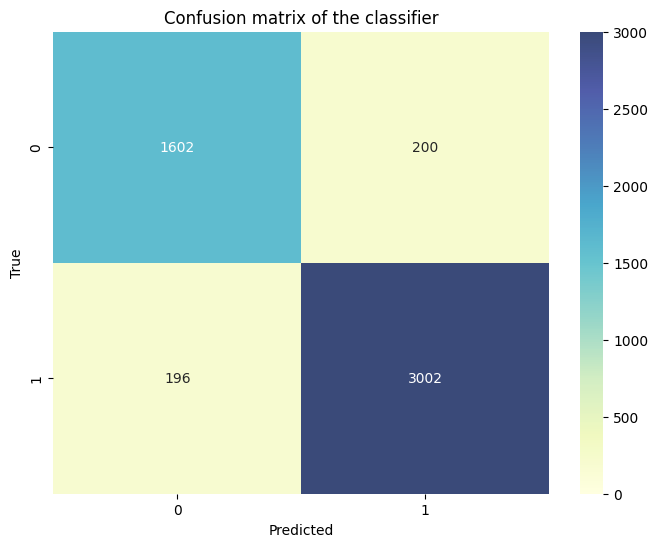

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.89      0.89      1802
           1       0.94      0.94      0.94      3198

    accuracy                           0.92      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.92      0.92      0.92      5000



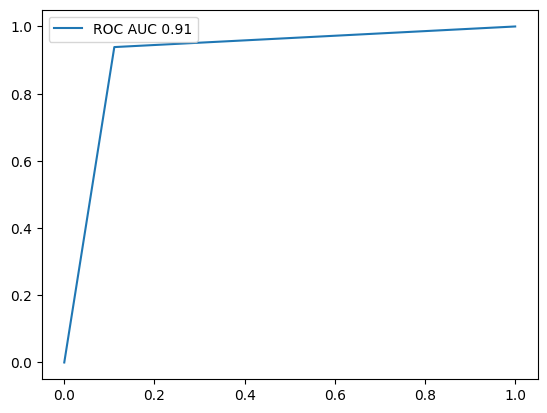

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB


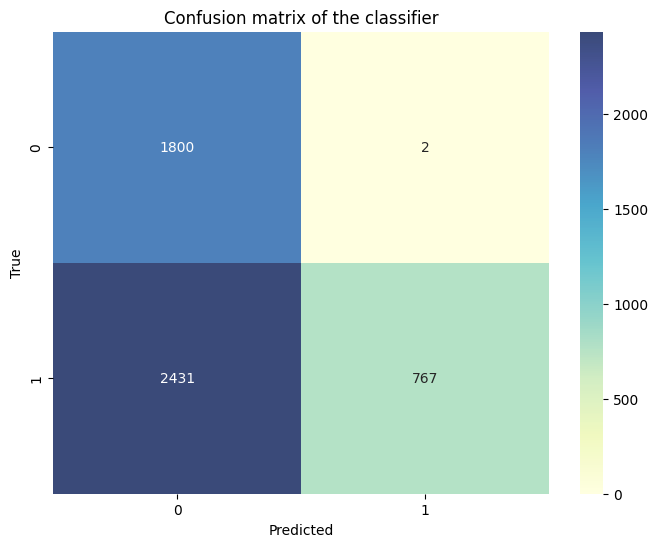

Classification Report:
              precision    recall  f1-score   support

           0       0.43      1.00      0.60      1802
           1       1.00      0.24      0.39      3198

    accuracy                           0.51      5000
   macro avg       0.71      0.62      0.49      5000
weighted avg       0.79      0.51      0.46      5000



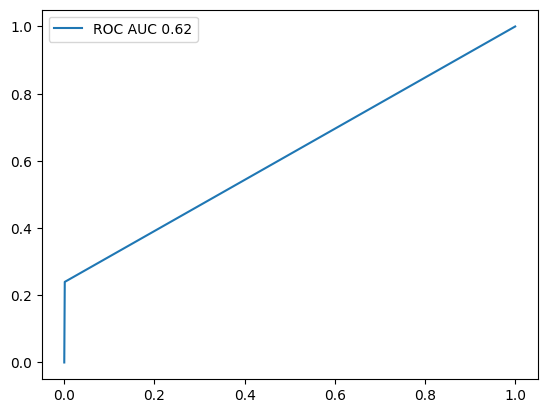

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier


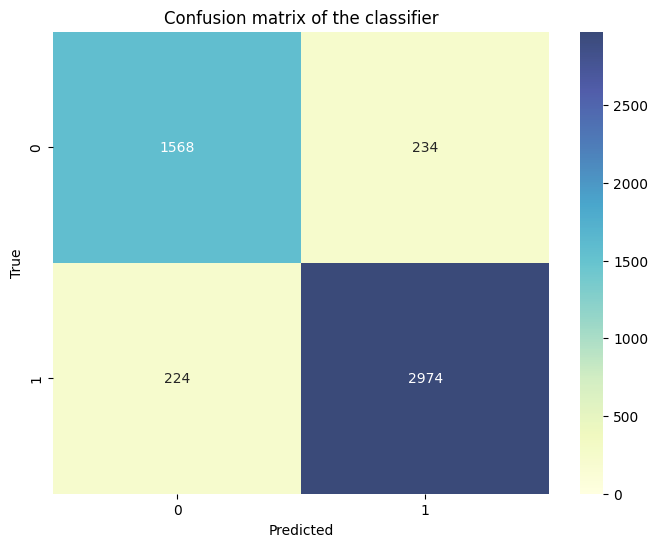

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      1802
           1       0.93      0.93      0.93      3198

    accuracy                           0.91      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.91      0.91      0.91      5000



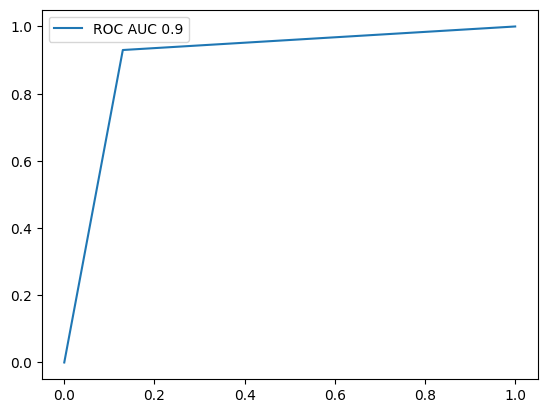

DecisionTreeClassifier


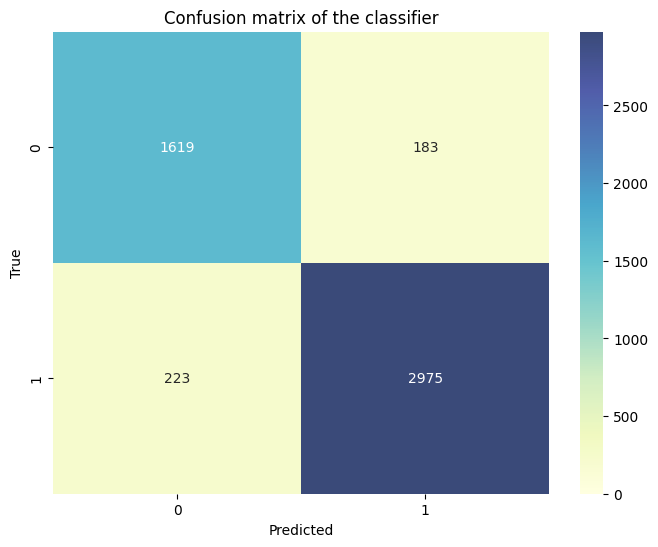

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89      1802
           1       0.94      0.93      0.94      3198

    accuracy                           0.92      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.92      0.92      0.92      5000



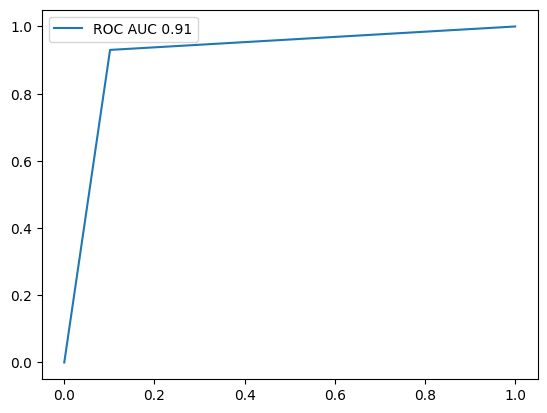

<ipython-input-42-ecc17f527c4d>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf.fit(X_train, y_train)


ExtraTreesClassifier


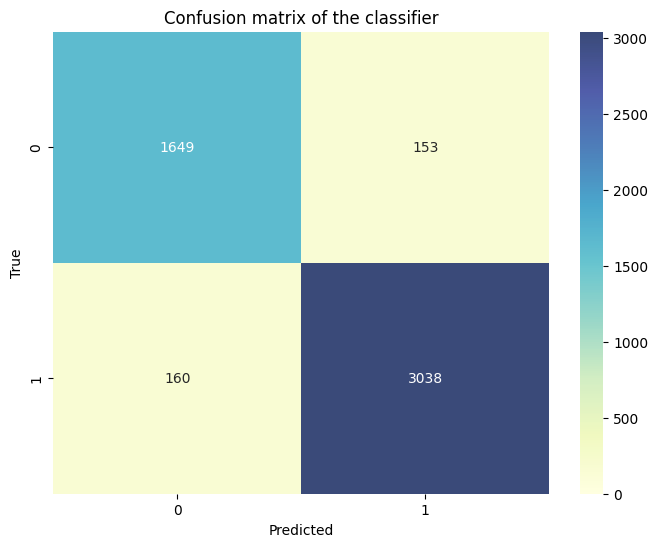

Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1802
           1       0.95      0.95      0.95      3198

    accuracy                           0.94      5000
   macro avg       0.93      0.93      0.93      5000
weighted avg       0.94      0.94      0.94      5000



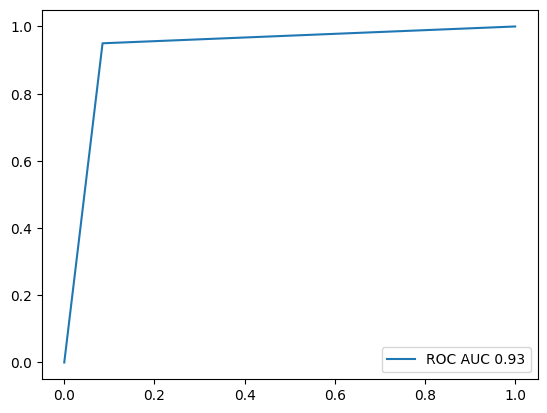

In [42]:
results_table = pd.DataFrame(columns=["Model", "Precision", "Recall", "F1", "ROC AUC"])
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred_proba = clf.predict(X_test)
    y_pred = [1 if x > 0.5 else 0 for x in y_pred_proba]
    print(name)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)
    plot_confusion_matrix(y_test, y_pred)
    print("Classification Report:")
    print(metrics.classification_report(y_test, y_pred))
    roc_auc(y_test, y_pred_proba)
    results_table = pd.concat(
        [
            results_table,
            pd.DataFrame(
                [[name, precision, recall, f1, auc]], columns=["Model", "Precision", "Recall", "F1", "ROC AUC"]
            ),
        ]
    )

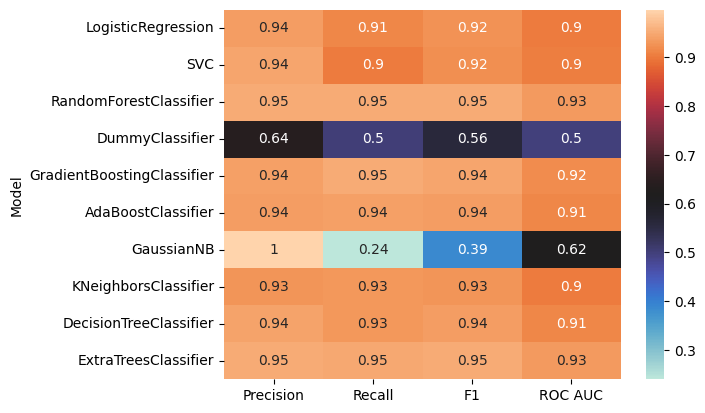

In [43]:
results_table.set_index('Model', inplace=True)
sns.heatmap(results_table, cmap="icefire", annot=True)
plt.show()